In [1]:
# This script includes all steps for the statistical analysis of the paper:
# "Investigating drivers' geospatial abilities in unfamiliar environments".
# It helps also generate the contents of Tables 1 and 2 and plots Figure 4 of the paper.
# The steps are presented with the same order as they are mentioned in the text.
# All data required to run the script are on the same repository as this script (drivers_data.7z).
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [23]:
Demographics <- read_csv("Demographics.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Group = col_character(),
  P_id = col_double(),
  age = col_double(),
  gender = col_character(),
  familiarity = col_double()
)




In [24]:
Demographics

Group,P_id,age,gender,familiarity
<chr>,<dbl>,<dbl>,<chr>,<dbl>
Group1,1,67,male,5
Group1,2,67,male,2
Group1,3,37,female,2
Group1,4,25,female,1
Group1,5,59,female,2
Group1,6,25,male,1
Group1,7,36,male,2
Group1,8,28,female,3
Group1,9,30,female,3


In [25]:
aggregate(
  Demographics[, 3],
  list(Demographics$Group), mean
)
aggregate(
  Demographics[, 3],
  list(Demographics$Group), sd
)
aggregate(
  Demographics[, 5],
  list(Demographics$Group), mean
)
aggregate(
  Demographics[, 5],
  list(Demographics$Group), sd
)

Group.1,age
<chr>,<dbl>
Group1,39.08333
Group2,48.69231


Group.1,age
<chr>,<dbl>
Group1,16.05365
Group2,16.85420


Group.1,familiarity
<chr>,<dbl>
Group1,2.250000
Group2,2.615385


Group.1,familiarity
<chr>,<dbl>
Group1,1.138180
Group2,1.325296


In [26]:
# SBSod_scored.csv includes the scored SBSoD Scale; reversed when necessary etc. 

SBSoD_scored <- read_csv("SBSoD_scored.csv")

SBSoDGroup1 <- SBSoD_scored[1:12, 1:17]
SBSoDGroup2 <- SBSoD_scored[13:25, 1:17]

SBSoD1 <- rowMeans(SBSoDGroup1[, 3:17])
SBSoD2 <- rowMeans(SBSoDGroup2[, 3:17])

SBSoD1Desc <- data.frame(
  mean(SBSoD1),
  sd(SBSoD1)
)

SBSoD2Desc <- data.frame(
  mean(SBSoD2),
  sd(SBSoD2)
)
colnames(SBSoD1Desc) <- c("Mean", "SD")
colnames(SBSoD2Desc) <- c("Mean", "SD")
shapiro.test(SBSoD1)
shapiro.test(SBSoD2)
wilcox.test(SBSoD1, SBSoD2,
  exact = FALSE
)


── Column specification ────────────────────────────────────────────────────────
cols(
  Group = col_character(),
  P_ID = col_double(),
  Q1 = col_double(),
  Q2 = col_double(),
  Q3 = col_double(),
  Q4 = col_double(),
  Q5 = col_double(),
  Q6 = col_double(),
  Q7 = col_double(),
  Q8 = col_double(),
  Q9 = col_double(),
  Q10 = col_double(),
  Q11 = col_double(),
  Q12 = col_double(),
  Q13 = col_double(),
  Q14 = col_double(),
  Q15 = col_double()
)





	Shapiro-Wilk normality test

data:  SBSoD1
W = 0.85811, p-value = 0.04629



	Shapiro-Wilk normality test

data:  SBSoD2
W = 0.89603, p-value = 0.118



	Wilcoxon rank sum test with continuity correction

data:  SBSoD1 and SBSoD2
W = 47.5, p-value = 0.1023
alternative hypothesis: true location shift is not equal to 0


In [27]:
# The file MapErrors.csv contains information on three map sketching elements examined.
# It also includes the column "landmarks score" to account for 
# the number of correctly added landmarks on map sketches.

MapErrors <- read_csv("MapErrors.csv")

MapErrorsGroup1 <- MapErrors[1:12, 1:7]
MapErrorsGroup2 <- MapErrors[13:25, 1:7]

MapErrorsGroup1Desc <- data.frame(
  mean(MapErrorsGroup1$`landmarks omitted`),
  sd(MapErrorsGroup1$`landmarks omitted`),
  mean(MapErrorsGroup1$`road segments`),
  sd(MapErrorsGroup1$`road segments`),
  mean(MapErrorsGroup1$`total map errors`),
  sd(MapErrorsGroup1$`total map errors`),
  mean(MapErrorsGroup1$`landmarks score`),
  sd(MapErrorsGroup1$`landmarks score`)
)
colnames(MapErrorsGroup1Desc) <- c(
  "MeanLandmarksOmitted", "SDLandmarksOmitted",
  "MeanRoadSegments", "SDRoadSegments",
  "MeanTotalMapErrors", "SDTotalMapErrors",
  "MeanLandmarksScore", "SDLandmarksScore"
)

MapErrorsGroup2Desc <- data.frame(
  mean(MapErrorsGroup2$`landmarks omitted`),
  sd(MapErrorsGroup2$`landmarks omitted`),
  mean(MapErrorsGroup2$`road segments`),
  sd(MapErrorsGroup2$`road segments`),
  mean(MapErrorsGroup2$`total map errors`),
  sd(MapErrorsGroup2$`total map errors`),
  mean(MapErrorsGroup2$`landmarks score`),
  sd(MapErrorsGroup2$`landmarks score`)
)
colnames(MapErrorsGroup2Desc) <- c(
  "MeanLandmarksOmitted",
  "SDLandmarksOmitted",
  "MeanRoadSegments",
  "SDRoadSegments",
  "MeanTotalMapErrors",
  "SDTotalMapErrors",
  "MeanLandmarksScore",
  "SDLandmarksScore"
)
shapiro.test(MapErrorsGroup1$`total map errors`)
shapiro.test(MapErrorsGroup2$`total map errors`)

MapErrorsttest <- t.test(
  MapErrorsGroup1$`total map errors`,
  MapErrorsGroup2$`total map errors`
)
shapiro.test(MapErrorsGroup1$`road segments`)
shapiro.test(MapErrorsGroup2$`road segments`)
Roadsegmentsttest <- t.test(
  MapErrorsGroup1$`road segments`,
  MapErrorsGroup2$`road segments`
)
shapiro.test(MapErrorsGroup1$`landmarks omitted`)
shapiro.test(MapErrorsGroup2$`landmarks omitted`)
Landmarksomittedttest <- t.test(
  MapErrorsGroup1$`landmarks omitted`,
  MapErrorsGroup2$`landmarks omitted`
)
shapiro.test(MapErrorsGroup1$`landmarks score`)
shapiro.test(MapErrorsGroup2$`landmarks score`)

LandmarksScorettest <- t.test(
  MapErrorsGroup1$`landmarks score`,
  MapErrorsGroup2$`landmarks score`
)


── Column specification ────────────────────────────────────────────────────────
cols(
  Group = col_character(),
  P_ID = col_double(),
  `landmarks omitted` = col_double(),
  `road segments` = col_double(),
  `wrong turns` = col_double(),
  `total map errors` = col_double(),
  `landmarks score` = col_double()
)





	Shapiro-Wilk normality test

data:  MapErrorsGroup1$`total map errors`
W = 0.9556, p-value = 0.7197



	Shapiro-Wilk normality test

data:  MapErrorsGroup2$`total map errors`
W = 0.90269, p-value = 0.1456



	Shapiro-Wilk normality test

data:  MapErrorsGroup1$`road segments`
W = 0.9239, p-value = 0.3199



	Shapiro-Wilk normality test

data:  MapErrorsGroup2$`road segments`
W = 0.93114, p-value = 0.3527



	Shapiro-Wilk normality test

data:  MapErrorsGroup1$`landmarks omitted`
W = 0.94728, p-value = 0.5976



	Shapiro-Wilk normality test

data:  MapErrorsGroup2$`landmarks omitted`
W = 0.97105, p-value = 0.9065



	Shapiro-Wilk normality test

data:  MapErrorsGroup1$`landmarks score`
W = 0.95638, p-value = 0.7312



	Shapiro-Wilk normality test

data:  MapErrorsGroup2$`landmarks score`
W = 0.87896, p-value = 0.06903


In [29]:
# The workflow that follows performs statistical analysis for Directions Estimates

DirEstim <- read_csv("Directions.csv") # Directions.csv contains the participants' estimates on four directions

DirCorrect <- data.frame(0, 10, 270, 0) # The four values denote the correct directions that participants had to estimate

colnames(DirCorrect) <- c("Dir1", "Dir2", "Dir3", "Dir4")
DirScores <- data.frame(
  DirCorrect$Dir1 - DirEstim$EST_DR1,
  DirCorrect$Dir2 - DirEstim$EST_DR2,
  DirCorrect$Dir3 - DirEstim$EST_DR3,
  DirCorrect$Dir4 - DirEstim$EST_DR4
)
colnames(DirScores) <- c(
  "ScoreDir1", "ScoreDir2",
  "ScoreDir3", "ScoreDir4"
)

AbsDirScores <- data.frame(abs(DirScores))
AbsDirScores$ScoreDir2[18] <- 40 # Handling the estimation between 270o and 359o so that the score falls below 180o

AAS <- rowMeans(AbsDirScores[, 1:4] * 100 / 180) # AAS: Absolute Accuracy Score
AASGroup1 <- AAS[1:12]
AASGroup2 <- AAS[13:25]
shapiro.test(AASGroup1)
shapiro.test(AASGroup2)
wilcox.test(AASGroup1, AASGroup2,
  exact = FALSE
)

mean(AASGroup1)
sd(AASGroup1)
mean(AASGroup2)
sd(AASGroup2)
mean(DirScores$ScoreDir2)
mean(DirScores$ScoreDir3)


── Column specification ────────────────────────────────────────────────────────
cols(
  Group = col_character(),
  P_id = col_double(),
  EST_DR1 = col_double(),
  EST_DR2 = col_double(),
  EST_DR3 = col_double(),
  EST_DR4 = col_double()
)





	Shapiro-Wilk normality test

data:  AASGroup1
W = 0.97056, p-value = 0.9166



	Shapiro-Wilk normality test

data:  AASGroup2
W = 0.83167, p-value = 0.01662



	Wilcoxon rank sum test with continuity correction

data:  AASGroup1 and AASGroup2
W = 85, p-value = 0.7216
alternative hypothesis: true location shift is not equal to 0


[1] 9.201389

[1] 1.45442

[1] 8.333333

[1] 2.792208

[1] -39.8

[1] -32.6

In [30]:
# The workflow that follows performs statistical analysis for Distances Estimates

DistEstim <- read_csv("Distances.csv") # Distances.csv contains the participants' estimates on four distances

DistCorrect <- data.frame(650, 60, 400, 55) # The values indicate the correct distances that participants had to estimate
colnames(DistCorrect) <- c("D1", "D2", "D3", "D4")
DistRelScores <- data.frame(
  DistEstim$ESTIM_D1 - DistCorrect$D1,
  DistEstim$ESTIM_D2 - DistCorrect$D2,
  DistEstim$ESTIM_D3 - DistCorrect$D3,
  DistEstim$ESTIM_D4 - DistCorrect$D4
)
colnames(DistRelScores) <- c(
  "RelScore1", "RelScore2",
  "RelScore3", "RelScore4"
)
DistAbScores <- data.frame(abs(DistRelScores))
colnames(DistAbScores) <- c(
  "AbScore1", "AbScore2",
  "AbScore3", "AbScore4"
)

DistAbScores$TotalScore <- rowMeans(DistAbScores[, 1:4]) # The total score in the distance estimation task is the average of the four distances estimates scores.
DistAbScores <- DistAbScores[-c(3), ] # participant with p_id=3 is excluded from further analysis related to distance estimates
DistRelScores <- DistRelScores[-c(3), ]
DistAbScoreGroup1 <- DistAbScores[1:11, 1:5]
DistAbScoreGroup2 <- DistAbScores[12:24, 1:5]
DistAbScore1Desc <- data.frame(
  mean(DistAbScoreGroup1$AbScore1),
  sd(DistAbScoreGroup1$AbScore1),
  mean(DistAbScoreGroup1$AbScore2),
  sd(DistAbScoreGroup1$AbScore2),
  mean(DistAbScoreGroup1$AbScore3),
  sd(DistAbScoreGroup1$AbScore3),
  mean(DistAbScoreGroup1$AbScore4),
  sd(DistAbScoreGroup1$AbScore4), 
  mean(DistAbScoreGroup1$TotalScore), 
  sd(DistAbScoreGroup1$TotalScore)
)
colnames(DistAbScore1Desc) <- c(
  "MeanScore1", "SDScore1",
  "MeanScore2", "SDScore2",
  "MeanScore3", "SDScore3",
  "MeanScore4", "SDScore4", 
  "MeanDistanceScore", "SDDistanceScore"
)

DistAbScore2Desc <- data.frame(
  mean(DistAbScoreGroup2$AbScore1),
  sd(DistAbScoreGroup2$AbScore1),
  mean(DistAbScoreGroup2$AbScore2),
  sd(DistAbScoreGroup2$AbScore2),
  mean(DistAbScoreGroup2$AbScore3),
  sd(DistAbScoreGroup2$AbScore3),
  mean(DistAbScoreGroup2$AbScore4),
  sd(DistAbScoreGroup2$AbScore4),
  mean(DistAbScoreGroup2$TotalScore),
  sd(DistAbScoreGroup2$TotalScore)
)
colnames(DistAbScore2Desc) <- c(
  "MeanScore1", "SDScore1",
  "MeanScore2", "SDScore2",
  "MeanScore3", "SDScore3",
  "MeanScore4", "SDScore4",
  "MeanDistanceScore",
  "SDDistanceScore"
)

shapiro.test(DistAbScoreGroup1$TotalScore)
shapiro.test(DistAbScoreGroup2$TotalScore)
Distancesttest <- t.test(
  DistAbScoreGroup1$TotalScore,
  DistAbScoreGroup2$TotalScore
)


── Column specification ────────────────────────────────────────────────────────
cols(
  Group = col_character(),
  P_id = col_double(),
  ESTIM_D1 = col_double(),
  ESTIM_D2 = col_double(),
  ESTIM_D3 = col_double(),
  ESTIM_D4 = col_double()
)





	Shapiro-Wilk normality test

data:  DistAbScoreGroup1$TotalScore
W = 0.90266, p-value = 0.1992



	Shapiro-Wilk normality test

data:  DistAbScoreGroup2$TotalScore
W = 0.97888, p-value = 0.9737


In [31]:
# Comparing between groups for each distance estimated; this script includes only the procedure for Distance #3

shapiro.test(DistAbScoreGroup1$AbScore3)
shapiro.test(DistAbScoreGroup2$AbScore3)
Distance3Comp <- wilcox.test(DistAbScoreGroup1$AbScore3,
  DistAbScoreGroup2$AbScore3,
  exact = FALSE
)


	Shapiro-Wilk normality test

data:  DistAbScoreGroup1$AbScore3
W = 0.9206, p-value = 0.3237



	Shapiro-Wilk normality test

data:  DistAbScoreGroup2$AbScore3
W = 0.64958, p-value = 0.0001816


In [32]:
shapiro.test(DistAbScoreGroup1$AbScore1)
shapiro.test(DistAbScoreGroup2$AbScore1)
Distance3Comp <- wilcox.test(DistAbScoreGroup1$AbScore3,
  DistAbScoreGroup2$AbScore3,
  exact = FALSE
)


	Shapiro-Wilk normality test

data:  DistAbScoreGroup1$AbScore1
W = 0.87966, p-value = 0.103



	Shapiro-Wilk normality test

data:  DistAbScoreGroup2$AbScore1
W = 0.90279, p-value = 0.1461


In [33]:
shapiro.test(DistAbScoreGroup1$AbScore2)
shapiro.test(DistAbScoreGroup2$AbScore2)
Distance3Comp <- wilcox.test(DistAbScoreGroup1$AbScore3,
  DistAbScoreGroup2$AbScore3,
  exact = FALSE
)


	Shapiro-Wilk normality test

data:  DistAbScoreGroup1$AbScore2
W = 0.87924, p-value = 0.1017



	Shapiro-Wilk normality test

data:  DistAbScoreGroup2$AbScore2
W = 0.81225, p-value = 0.009565


In [34]:
shapiro.test(DistAbScoreGroup1$AbScore4)
shapiro.test(DistAbScoreGroup2$AbScore4)
Distance3Comp <- wilcox.test(DistAbScoreGroup1$AbScore3,
  DistAbScoreGroup2$AbScore3,
  exact = FALSE
)


	Shapiro-Wilk normality test

data:  DistAbScoreGroup1$AbScore4
W = 0.91781, p-value = 0.3009



	Shapiro-Wilk normality test

data:  DistAbScoreGroup2$AbScore4
W = 0.89245, p-value = 0.1054


In [35]:
shapiro.test(DistAbScoreGroup1$TotalScore)
shapiro.test(DistAbScoreGroup2$TotalScore)
Distance3Comp <- wilcox.test(DistAbScoreGroup1$AbScore3,
  DistAbScoreGroup2$AbScore3,
  exact = FALSE
)


	Shapiro-Wilk normality test

data:  DistAbScoreGroup1$TotalScore
W = 0.90266, p-value = 0.1992



	Shapiro-Wilk normality test

data:  DistAbScoreGroup2$TotalScore
W = 0.97888, p-value = 0.9737


In [36]:
#The process that follows consists of finding absolute and relative standard errors of distance estimates

meanAbsError <- data.frame(
  mean(DistAbScores$AbScore1 / DistCorrect$D1 * 100),
  mean(DistAbScores$AbScore2 / DistCorrect$D2 * 100),
  mean(DistAbScores$AbScore3 / DistCorrect$D3 * 100),
  mean(DistAbScores$AbScore4 / DistCorrect$D4 * 100)
)
colnames(meanAbsError) <- c(
  "AbsEstError1", "AbsEstError2",
  "AbsEstError3", "AbsEstError4"
)

meanRelError <- data.frame(
  mean(DistRelScores$RelScore1 / DistCorrect$D1 * 100),
  mean(DistRelScores$RelScore2 / DistCorrect$D2 * 100),
  mean(DistRelScores$RelScore3 / DistCorrect$D3 * 100),
  mean(DistRelScores$RelScore4 / DistCorrect$D4 * 100)
)
colnames(meanRelError) <- c(
  "RelEstError1", "RelEstError2",
  "RelEstError3", "RelEstError4"
)

In [37]:
meanAbsError
meanRelError

AbsEstError1,AbsEstError2,AbsEstError3,AbsEstError4
<dbl>,<dbl>,<dbl>,<dbl>
25.19231,39.58333,27.39583,36.36364


RelEstError1,RelEstError2,RelEstError3,RelEstError4
<dbl>,<dbl>,<dbl>,<dbl>
-7.884615,22.91667,1.770833,-5.30303


In [38]:
# Finding standard errors for absolute and relative distance scores (in %)

seD1_absolute <- function() sqrt(var((DistAbScores$AbScore1 / DistCorrect$D1) * 100) / 24)
seD2_absolute <- function() sqrt(var((DistAbScores$AbScore2 / DistCorrect$D2) * 100) / 24)
seD3_absolute <- function() sqrt(var((DistAbScores$AbScore3 / DistCorrect$D3) * 100) / 24)
seD4_absolute <- function() sqrt(var((DistAbScores$AbScore4 / DistCorrect$D4) * 100) / 24)

seD1_relative <- function() sqrt(var((DistRelScores$RelScore1 / DistCorrect$D1) * 100) / 24)
seD2_relative <- function() sqrt(var((DistRelScores$RelScore2 / DistCorrect$D2) * 100) / 24)
seD3_relative <- function() sqrt(var((DistRelScores$RelScore3/DistCorrect$D3)*100)/24)
seD4_relative <- function() sqrt(var((DistRelScores$RelScore4/DistCorrect$D4)*100)/24)

seAbsolute<-c(seD1_absolute(), seD2_absolute(), 
              seD3_absolute(), seD4_absolute())
seRelative<-c(seD1_relative(), seD2_relative(), 
              seD3_relative(), seD4_relative())
seAbsolute <- round(seAbsolute, digits = 2)
seRelative <- round(seRelative, digits = 2)

meanRelativeErrors <- as.vector(t(meanRelError))
meanRelativeErrors <- round(meanRelativeErrors, digits = 2)
meanAbsoluteErrors <- as.vector(t(meanAbsError))
meanAbsoluteErrors <- round(meanAbsoluteErrors, digits = 2)

DistCorrect <- as.vector(t(DistCorrect))

In [39]:
meanRelativeErrors
meanAbsoluteErrors

[1] -7.88 22.92  1.77 -5.30

[1] 25.19 39.58 27.40 36.36

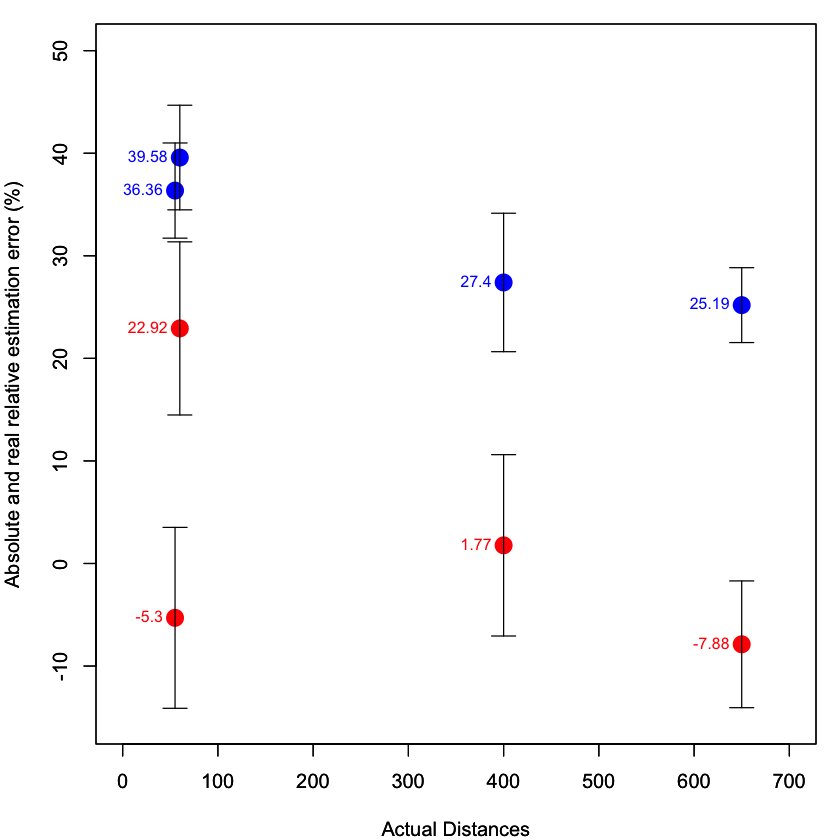

In [40]:
# What follows creates the plot of the mean and standard error bars for both relative and absolute distance estimates; figure 4 of the paper.

par(mar = c(4, 4, 1, 1))
plot(DistCorrect, meanAbsoluteErrors,
  xlim = c(0, 700),
  ylim = c(-15, 50), xlab = "Actual Distances",
  ylab = "Absolute and real relative estimation error (%)",
  pch = 16, cex = 2, col = "blue"
)
arrows(
  x0 = DistCorrect, y0 = meanAbsoluteErrors - seAbsolute,
  x1 = DistCorrect, y1 = meanAbsoluteErrors + seAbsolute,
  code = 3, angle = 90, length = 0.1
)
text(DistCorrect,
  y = meanAbsoluteErrors,
  labels = meanAbsoluteErrors, pos = 2,
  offset = 0.5, cex = 0.8, col = "blue"
)
par(new = TRUE)
plot(DistCorrect, meanRelativeErrors,
  xlim = c(0, 700), ylim = c(-15, 50),
  xlab = "Actual Distances", ylab = "Absolute and real relative estimation error (%)",
  pch = 16, cex = 2, col = "red"
)
arrows(
  x0 = DistCorrect, y0 = meanRelativeErrors - seRelative,
  x1 = DistCorrect, y1 = meanRelativeErrors + seRelative,
  code = 3, angle = 90, length = 0.1
)
text(DistCorrect,
  y = meanRelativeErrors,
  labels = meanRelativeErrors, pos = 2, offset = 0.5,
  cex = 0.8, col = "red"
)

In [43]:
# Correlations calculations between variables follow.
# Spearman Correlations between variables for Group 1; generates the contents of Table 1

SBSoDMapErr1 <- cor.test(SBSoD1, MapErrorsGroup1$`total map errors`,
  method = "spearman", exact = FALSE
)
SBSoDLandOmit1 <- cor.test(SBSoD1, MapErrorsGroup1$`landmarks omitted`,
  method = "spearman", exact = FALSE
)
SBSoDRoadSeg1 <- cor.test(SBSoD1, MapErrorsGroup1$`road segments`,
  method = "spearman", exact = FALSE
)
LandOmitRoadSeg1 <- cor.test(MapErrorsGroup1$`landmarks omitted`,
  MapErrorsGroup1$`road segments`,
  method = "spearman", exact = FALSE
)
SBSoDAAS1 <- cor.test(SBSoD1, AASGroup1,
  method = "spearman",
  exact = FALSE
)
SBSoDDist1 <- cor.test(SBSoD1[-c(3)], DistAbScoreGroup1$TotalScore,
  method = "spearman", exact = FALSE
)
MapErrAAS1 <- cor.test(MapErrorsGroup1$`total map errors`, AASGroup1,
  method = "spearman", exact = FALSE
)
MapErrDist1 <- cor.test(MapErrorsGroup1$`total map errors`[-c(3)],
  DistAbScoreGroup1$TotalScore,
  method = "spearman", exact = FALSE
)
AASDist1 <- cor.test(AASGroup1[-c(3)], DistAbScoreGroup1$TotalScore,
  method = "spearman", exact = FALSE
)
correlationsGroup1 <- c(
  round(SBSoDMapErr1$estimate, digits = 2),
  (round(SBSoDLandOmit1$estimate, digits = 2)),
  (round(SBSoDRoadSeg1$estimate, digits = 2)),
  (round(LandOmitRoadSeg1$estimate, digits = 2)),
  (round(SBSoDAAS1$estimate, digits = 2)),
  (round(SBSoDDist1$estimate, digits = 2)),
  (round(MapErrAAS1$estimate, digits = 2)),
  (round(MapErrDist1$estimate, digits = 2)),
  (round(AASDist1$estimate, digits = 2))
) 

In [45]:
# Builds the vector of Spearman's rhos (two digits)

pvaluesGroup1 <- c(
  round(SBSoDMapErr1$p.value, digits = 3),
  (round(SBSoDLandOmit1$p.value, digits = 3)),
  (round(SBSoDRoadSeg1$p.value, digits = 3)),
  (round(LandOmitRoadSeg1$p.value, digits = 3)),
  (round(SBSoDAAS1$p.value, digits = 3)),
  (round(SBSoDDist1$p.value, digits = 3)),
  (round(MapErrAAS1$p.value, digits = 3)),
  (round(MapErrDist1$p.value, digits = 3)),
  (round(AASDist1$p.value, digits = 3))
) 

In [47]:
#Builds the vector of p-values for rs estimates (three digits)

CorrelationsGroup1Table <- data.frame(
  correlationsGroup1,
  pvaluesGroup1
) 

In [52]:
CorrelationsGroup1Table

correlationsGroup1,pvaluesGroup1
<dbl>,<dbl>
-0.62,0.032
-0.27,0.388
-0.65,0.023
0.44,0.155
0.18,0.568
-0.55,0.077
0.02,0.939
0.54,0.090
0.06,0.851


In [48]:
# Generates the contents of Table 1 in the form of a data frame.
# Spearman Correlations between variables for Group 2; to generate the contents of Table 2.

SBSoDMapErr2 <- cor.test(SBSoD2, MapErrorsGroup2$`total map errors`,
  method = "spearman", exact = FALSE
)
SBSoDLandOmit2 <- cor.test(SBSoD2, MapErrorsGroup2$`landmarks omitted`,
  method = "spearman", exact = FALSE
)
SBSoDRoadSeg2 <- cor.test(SBSoD2, MapErrorsGroup2$`road segments`,
  method = "spearman", exact = FALSE
)
LandOmitRoadSeg2 <- cor.test(MapErrorsGroup2$`landmarks omitted`,
  MapErrorsGroup2$`road segments`,
  method = "spearman", exact = FALSE
)
SBSoDAAS2 <- cor.test(SBSoD2, AASGroup2, method = "spearman", exact = FALSE)
SBSoDDist2 <- cor.test(SBSoD2, DistAbScoreGroup2$TotalScore,
  method = "spearman", exact = FALSE
)
MapErrAAS2 <- cor.test(MapErrorsGroup2$`total map errors`,
  AASGroup2,
  method = "spearman", exact = FALSE
)
MapErrDist2 <- cor.test(MapErrorsGroup2$`total map errors`,
  DistAbScoreGroup2$TotalScore,
  method = "spearman", exact = FALSE
)
AASDist2 <- cor.test(AASGroup2, DistAbScoreGroup2$TotalScore,
  method = "spearman", exact = FALSE
)
correlationsGroup2 <- c(
  round(SBSoDMapErr2$estimate, digits = 2),
  (round(SBSoDLandOmit2$estimate, digits = 2)),
  (round(SBSoDRoadSeg2$estimate, digits = 2)),
  (round(LandOmitRoadSeg2$estimate, digits = 2)),
  (round(SBSoDAAS2$estimate, digits = 2)),
  (round(SBSoDDist2$estimate, digits = 2)),
  (round(MapErrAAS2$estimate, digits = 2)),
  (round(MapErrDist2$estimate, digits = 2)),
  (round(AASDist2$estimate, digits = 2))
) 

In [49]:
# Builds the vector of Spearman's rhos

pvaluesGroup2 <- c(
  round(SBSoDMapErr2$p.value, digits = 3),
  (round(SBSoDLandOmit2$p.value, digits = 3)),
  (round(SBSoDRoadSeg2$p.value, digits = 3)),
  (round(LandOmitRoadSeg2$p.value, digits = 3)),
  (round(SBSoDAAS2$p.value, digits = 3)),
  (round(SBSoDDist2$p.value, digits = 3)),
  (round(MapErrAAS2$p.value, digits = 3)),
  (round(MapErrDist2$p.value, digits = 3)),
  (round(AASDist2$p.value, digits = 3))
) 

In [50]:
#Builds the vector of p-values for rs estimates
CorrelationsGroup2Table <- data.frame(
  correlationsGroup2,
  pvaluesGroup2
) # Generates the content of Table 2 in the form of of data frame.

In [51]:
CorrelationsGroup2Table

correlationsGroup2,pvaluesGroup2
<dbl>,<dbl>
-0.59,0.034
-0.43,0.142
-0.41,0.159
-0.03,0.915
0.20,0.505
-0.52,0.066
-0.07,0.812
0.34,0.261
-0.66,0.014
